# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Silvia Dela Pranistia
- **Email:** silviadela52@gmail.com
- **ID Dicoding:** silvia_dela_pranistia_kDUR

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren perubahan polutan (CO, NO₂, PM10, PM2.5) dari waktu ke waktu?  
2. Bagaimana variasi rata-rata konsentrasi polutan (PM2.5, PM10, CO, NO₂) di Beijing pada setiap musim selama tahun 2013–2017?

## Import Semua Packages/Library yang Digunakan

In [87]:
# Library utama untuk analisis data
import pandas as pd
import numpy as np

# Library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

# Pengaturan tampilan visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

print("Semua library berhasil diimpor.")


Semua library berhasil diimpor.


## Data Wrangling

### Gathering Data

In [88]:
# Tentukan lokasi semua file dataset di folder lokal
path = 'PRSA_Data_20130301-20170228'  # folder yang berisi file CSV

# Cari semua file yang diawali dengan "PRSA_Data_"
all_files = glob.glob(os.path.join(path, "PRSA_Data_*.csv"))

print("File ditemukan:")
for f in all_files:
    print("-", os.path.basename(f))

# Baca seluruh file CSV dan tambahkan nama stasiun (dari nama file)
dataframes = []
for filename in all_files:
    df_temp = pd.read_csv(filename, delimiter=',', quotechar='"')
    df_temp['station_name'] = os.path.basename(filename).replace('PRSA_Data_','').replace('_20130301-20170228.csv','')
    dataframes.append(df_temp)

# Gabungkan seluruh dataframe menjadi satu
df = pd.concat(dataframes, ignore_index=True)

# 5. Tampilkan 5 baris pertama
print(f"\n Total data gabungan: {len(df):,} baris")
df.head()

File ditemukan:
- PRSA_Data_Aotizhongxin_20130301-20170228.csv
- PRSA_Data_Changping_20130301-20170228.csv
- PRSA_Data_Dingling_20130301-20170228.csv
- PRSA_Data_Dongsi_20130301-20170228.csv
- PRSA_Data_Guanyuan_20130301-20170228.csv
- PRSA_Data_Gucheng_20130301-20170228.csv
- PRSA_Data_Huairou_20130301-20170228.csv
- PRSA_Data_Nongzhanguan_20130301-20170228.csv
- PRSA_Data_Shunyi_20130301-20170228.csv
- PRSA_Data_Tiantan_20130301-20170228.csv
- PRSA_Data_Wanliu_20130301-20170228.csv
- PRSA_Data_Wanshouxigong_20130301-20170228.csv

 Total data gabungan: 420,768 baris


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,station_name
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Aotizhongxin


**Insight:**
- Dataset berhasil dimuat dan terdiri dari pengamatan kualitas udara tiap jam daridari 12 stasiun pemantauan di Beijing.
Stasiun-stasiun tersebut meliputi: Aotizhongxin, Changping, Dingling, Dongsi, Gucheng, Guanyuan, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, dan Wanshouxigong.
- Kolom yang tersedia mencakup waktu (year, month, day, hour), berbagai polutan (PM2.5, PM10, SO₂, NO₂, CO, O₃), serta kondisi cuaca (TEMP, PRES, DEWP, RAIN, WSPM).
- Data ini akan digunakan untuk menganalisis tren polusi dan hubungannya dengan suhu serta kelembapan.


### Assessing Data

In [89]:
# Data Wrangling — Assessing Data

# 1. Cek ukuran dataset (jumlah baris dan kolom)
print("Ukuran dataset:", df.shape)

# 2. Lihat tipe data setiap kolom
print("\nTipe data tiap kolom:")
print(df.dtypes)

# 3. Cek jumlah data kosong (missing values)
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())

# 4. Cek apakah ada data duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())

# 5. Lihat statistik deskriptif untuk kolom numerik
df.describe()


Ukuran dataset: (420768, 19)

Tipe data tiap kolom:
No                int64
year              int64
month             int64
day               int64
hour              int64
PM2.5           float64
PM10            float64
SO2             float64
NO2             float64
CO              float64
O3              float64
TEMP            float64
PRES            float64
DEWP            float64
RAIN            float64
wd               object
WSPM            float64
station          object
station_name     object
dtype: object

Jumlah missing value per kolom:
No                  0
year                0
month               0
day                 0
hour                0
PM2.5            8739
PM10             6449
SO2              9021
NO2             12116
CO              20701
O3              13277
TEMP              398
PRES              393
DEWP              403
RAIN              390
wd               1822
WSPM              318
station             0
station_name        0
dtype: int64

Jumlah data d

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


**Insight:**
- Dataset gabungan memiliki 420.768 baris dan 19 kolom, berisi data kualitas udara per jam dari 12 stasiun pemantauan di Beijing.
- Kolom `PM2.5`, `PM10`, dan `CO` memiliki beberapa nilai kosong sehingga perlu dilakukan pembersihan pada tahap berikutnya.
- Tidak ditemukan duplikasi data.
- Sebagian besar kolom bertipe numerik (float64), sedangkan `wd` dan `station` bertipe teks (object).


### Cleaning Data

In [90]:
# Data Wrangling — Cleaning Data

# Hapus baris yang semua nilainya kosong
df.dropna(how='all', inplace=True)

# Isi nilai kosong (NaN) pada kolom polutan dengan nilai rata-rata kolom tersebut
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for col in pollutants:
      df[col].fillna(df[col].mean(), inplace=True)

# Pastikan kolom numerik memiliki tipe data yang benar
numeric_cols = ['year', 'month', 'day', 'hour'] + pollutants + ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Buat kolom datetime dari kombinasi tahun, bulan, hari, dan jam
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']], errors='coerce')

# Tangani missing value untuk kolom cuaca & angin
weather_cols = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Isi dengan nilai rata-rata kolom
for col in weather_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Untuk kolom arah angin (wd) isi dengan modus (nilai yang paling sering muncul)
df['wd'] = df['wd'].fillna(df['wd'].mode().iloc[0])

# Urutkan data berdasarkan waktu
df.sort_values('datetime', inplace=True)

# Cek ulang apakah masih ada missing value
print("Jumlah missing value setelah cleaning:")
print(df.isnull().sum())


C:\Users\Silvia Dels\AppData\Local\Temp\ipykernel_12900\3369625527.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\Silvia Dels\AppData\Local\Temp\ipykernel_12900\3369625527.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Jumlah missing value setelah cleaning:
No              0
year            0
month           0
day             0
hour            0
PM2.5           0
PM10            0
SO2             0
NO2             0
CO              0
O3              0
TEMP            0
PRES            0
DEWP            0
RAIN            0
wd              0
WSPM            0
station         0
station_name    0
datetime        0
dtype: int64


**Insight:**
- Seluruh kolom berhasil dibersihkan dari nilai kosong.
- Kolom numerik diisi dengan nilai rata-rata, sedangkan kolom arah angin (`wd`) diisi dengan nilai modus.
- Dataset kini sepenuhnya bersih dan siap digunakan

## Exploratory Data Analysis (EDA)

### Explore ...

Ringkasan Statistik Data:


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,2.490822,1.729711
std,79.978679,91.066422,21.417257,34.618463,1131.283304,55.760484,11.430729,13.787240,1.245914
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,-43.400000,0.000000
25%,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,-8.900000,0.900000
50%,57.000000,84.000000,8.000000,45.000000,900.000000,47.000000,14.500000,3.000000,1.400000
75%,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,15.100000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,29.100000,13.200000


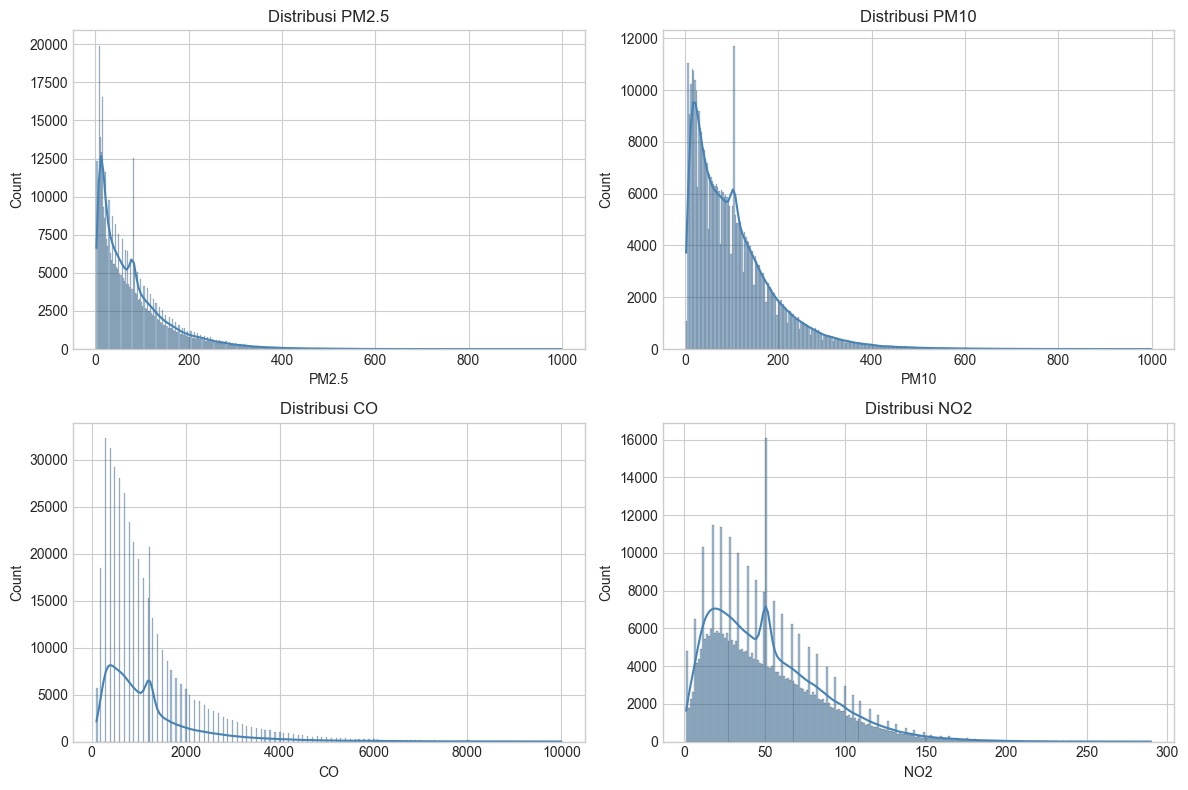

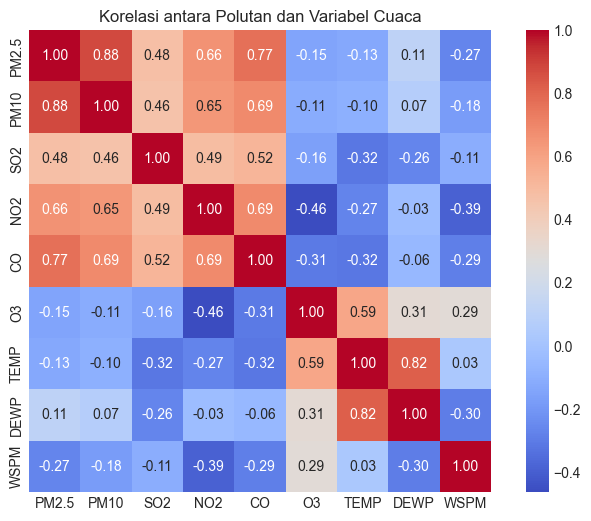

In [91]:
# Cek ringkasan statistik dari data numerik
print("Ringkasan Statistik Data:")
display(df[['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','DEWP','WSPM']].describe())

# Cek distribusi data untuk polutan utama
plt.figure(figsize=(12, 8))
for i, col in enumerate(['PM2.5', 'PM10', 'CO', 'NO2'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='steelblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Heatmap korelasi antara polutan & parameter cuaca
corr_cols = ['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','DEWP','WSPM']
corr = df[corr_cols].corr()

plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Korelasi antara Polutan dan Variabel Cuaca")
plt.show()

**Insight:**
- Distribusi seluruh polutan (PM2.5, PM10, CO, dan NO2) menunjukkan pola condong ke kanan (right-skewed), menandakan sebagian besar nilai berada pada konsentrasi rendah dengan beberapa nilai ekstrem tinggi.
- PM2.5 dan PM10 memiliki sebaran paling besar, menunjukkan fluktuasi signifikan terhadap kondisi udara.
- Konsentrasi CO cenderung stabil di kisaran rendah namun memiliki nilai puncak pada periode tertentu yang mengindikasikan peningkatan aktivitas pembakaran atau emisi kendaraan.
- NO2 menunjukkan pola distribusi ganda (bimodal), mengindikasikan adanya dua kondisi dominan kualitas udara di lokasi pengamatan.


## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana tren perubahan polutan (CO, NO₂, PM10, PM2.5) dari waktu ke waktu?

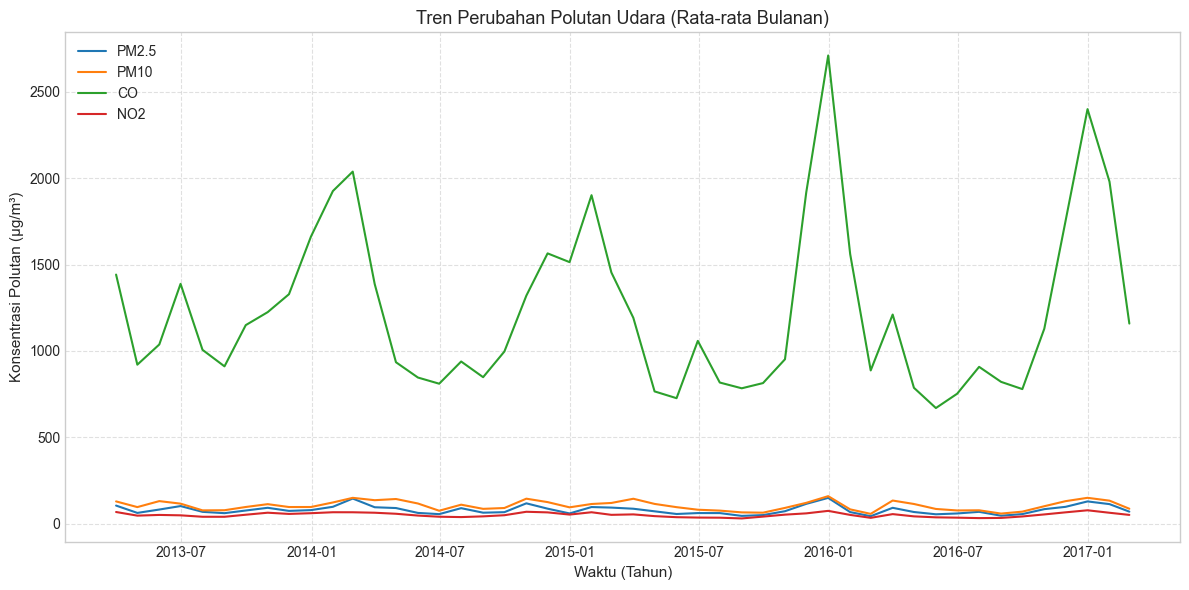

In [92]:
# =====================================================
# Pertanyaan 1:
# Bagaimana tren perubahan polutan (CO, NO₂, PM10, PM2.5) dari waktu ke waktu?
# =====================================================

# Pastikan kolom datetime sudah ada
if 'datetime' not in df.columns:
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']], errors='coerce')

# Set kolom datetime sebagai index agar bisa diolah secara time series
df = df.set_index('datetime')

# Ambil rata-rata per bulan agar tren jangka panjangnya terlihat
monthly_pollutants = df[['PM2.5', 'PM10', 'CO', 'NO2']].resample('ME').mean()

# Visualisasi tren polutan dari waktu ke waktu
plt.figure(figsize=(12, 6))
for col in monthly_pollutants.columns:
    plt.plot(monthly_pollutants.index, monthly_pollutants[col], label=col)

plt.title("Tren Perubahan Polutan Udara (Rata-rata Bulanan)", fontsize=13)
plt.xlabel("Waktu (Tahun)", fontsize=11)
plt.ylabel("Konsentrasi Polutan (µg/m³)", fontsize=11)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


**insight** :
* Kadar polutan (PM2.5, PM10, CO, dan NO₂) cenderung meningkat pada musim dingin
(Desember-Februari) dan menurun saat musim panas (Juni-Agustus), menunjukkan adanya pola musiman akibat faktor cuaca dan aktivitas pembakaran.
* Gas CO memiliki fluktuasi tertinggi dibanding polutan lainnya, menandakan bahwa sumbernya sangat dipengaruhi oleh aktivitas manusia seperti transportasi dan pembakaran bahan bakar.

### Pertanyaan 2:Bagaimana variasi rata-rata konsentrasi polutan (PM2.5, PM10, CO, NO₂) di Beijing pada setiap musim selama tahun 2013–2017?

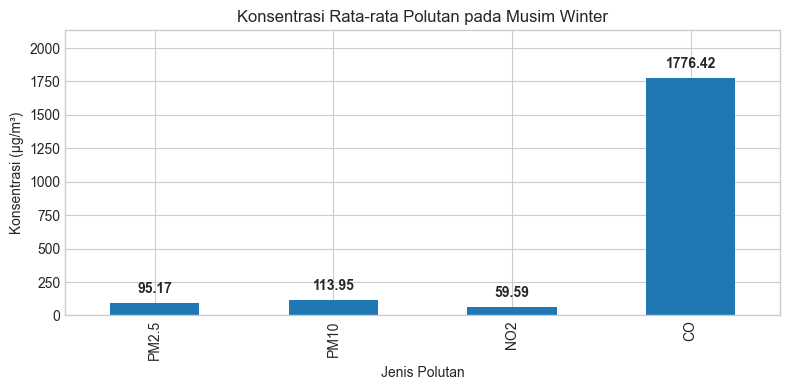

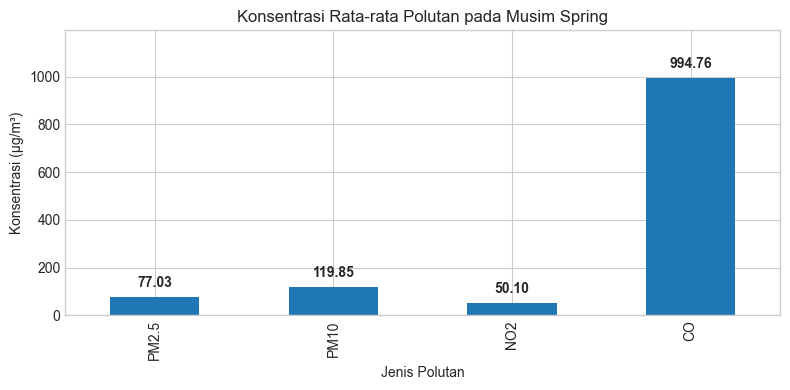

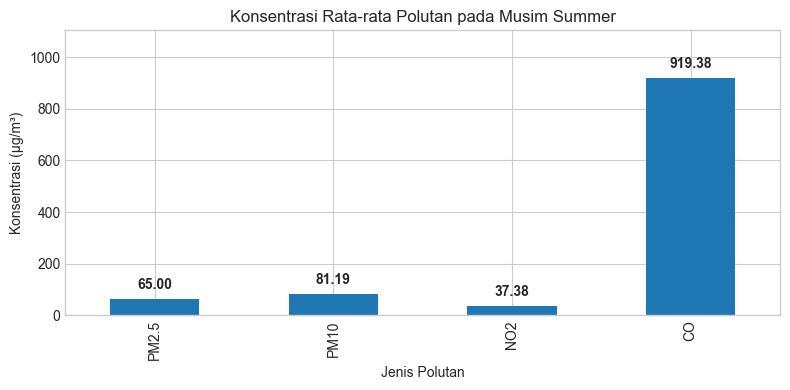

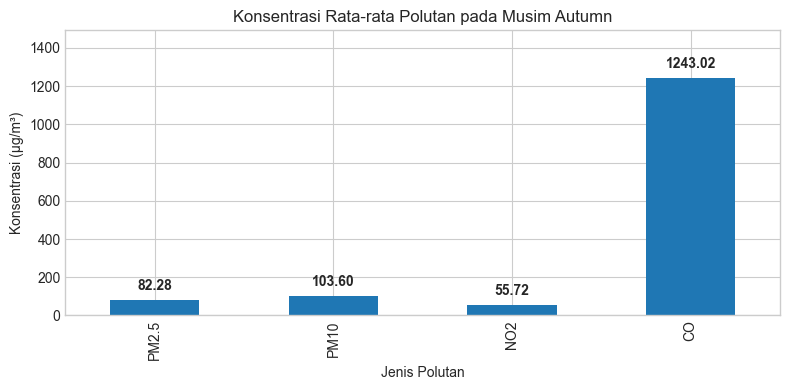

In [ ]:
fdf = df.copy()

if 'datetime' not in fdf.columns:
    if 'timestamp' in fdf.columns:
        fdf['datetime'] = pd.to_datetime(fdf['timestamp'], errors='coerce')
    elif all(c in fdf.columns for c in ['year','month','day','hour']):
        fdf['datetime'] = pd.to_datetime(fdf[['year','month','day','hour']], errors='coerce')
    else:
        raise ValueError("Tidak ada kolom datetime/timestamp atau komponen waktu.")

fdf = fdf.dropna(subset=['datetime']).copy()
fdf['datetime'] = pd.to_datetime(fdf['datetime'], errors='coerce')

_candidate = {
    'PM2.5': ['PM2.5','PM2_5','PM25'],
    'PM10' : ['PM10'],
    'NO2'  : ['NO2'],
    'CO'   : ['CO']  
}
pollutant_cols = []
for std, aliases in _candidate.items():
    for a in aliases:
        if a in fdf.columns:
            if a != std:
                fdf = fdf.rename(columns={a: std})
            pollutant_cols.append(std)
            break

fdf["month_num"] = fdf["datetime"].dt.month

def to_season(m):
    if m in [12, 1, 2]:
        return "Winter"
    elif m in [3, 4, 5]:
        return "Spring"
    elif m in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

fdf["season"] = fdf["month_num"].apply(to_season)
season_order = ["Winter", "Spring", "Summer", "Autumn"]

def plot_one_season_dashboard(season="Winter", selected_pollutants=None):
    if selected_pollutants is None:
        selected_pollutants = ['PM2.5','PM10','NO2','CO']

    # pastikan hanya kolom yang ada
    sel = [p for p in selected_pollutants if p in pollutant_cols]

    season_mean = (
        fdf.groupby("season")[pollutant_cols]
           .mean(numeric_only=True)
           .reindex(season_order)
    )

    if season not in season_mean.index or season_mean.loc[season].isna().all():
        print("⚠️ Data untuk musim ini kosong setelah filter.")
        return

    row = season_mean.loc[season].dropna()
    row = row[row.index.isin(sel)]

    fig, ax = plt.subplots(figsize=(8, 4))
    row.plot(kind="bar", ax=ax)

    ax.set_title(f"Konsentrasi Rata-rata Polutan pada Musim {season}")
    ax.set_ylabel("Konsentrasi (µg/m³)")
    ax.set_xlabel("Jenis Polutan")

    if len(row) > 0:
        vmax = float(row.max())
        ax.set_ylim(0, vmax * 1.2)
        for i, v in enumerate(row.values):
            ax.text(i, v + (vmax * 0.03), f"{v:.2f}",
                    ha="center", va="bottom", fontsize=10, fontweight="bold")

    plt.tight_layout()
    plt.show()

plot_one_season_dashboard(season="Winter", selected_pollutants=['PM2.5','PM10','NO2','CO'])
plot_one_season_dashboard(season="Spring", selected_pollutants=['PM2.5','PM10','NO2','CO'])
plot_one_season_dashboard(season="Summer", selected_pollutants=['PM2.5','PM10','NO2','CO'])
plot_one_season_dashboard(season="Autumn", selected_pollutants=['PM2.5','PM10','NO2','CO'])


**insight**:
* Winter (Musim Dingin): Polusi tertinggi, terutama PM10 dan CO, akibat pembakaran batu bara dan udara dingin yang menahan polutan.
* Spring (Musim Semi): PM10 meningkat karena badai pasir dari wilayah utara Tiongkok.
* Summer (Musim Panas): Kualitas udara terbaik, suhu tinggi dan angin kuat membantu menyebarkan polutan.
* Autumn (Musim Gugur): Polusi mulai naik lagi (terutama NO₂ dan CO) menjelang musim dingin.

## Analisis Lanjutan (Opsional)

C:\Users\Silvia Dels\AppData\Local\Temp\ipykernel_12900\81276644.py:81: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\Silvia Dels\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


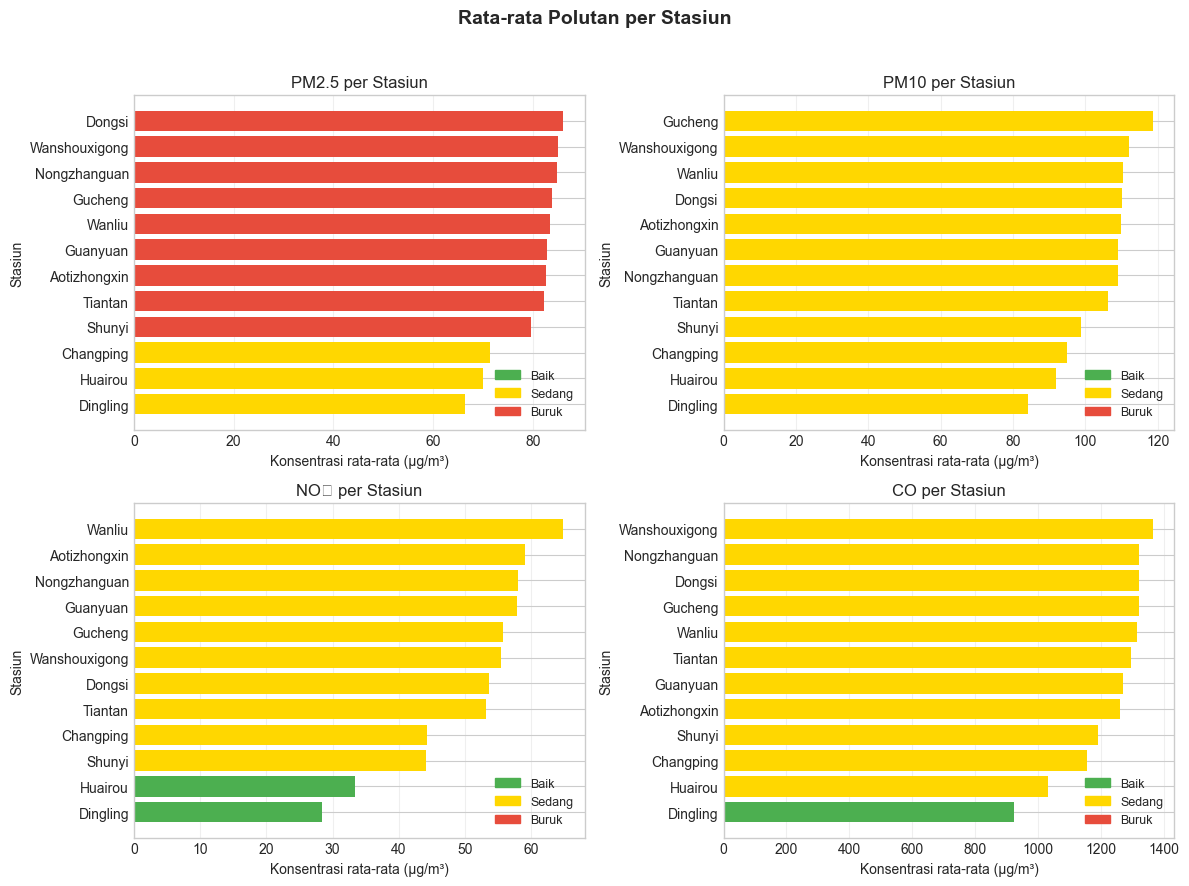

In [ ]:
# === 1) Rata-rata polutan per stasiun ===
if 'station' not in df.columns and 'station_name' in df.columns:
    df = df.copy()
    df.rename(columns={'station_name': 'station'}, inplace=True)

pollutants = [c for c in ['PM2.5','PM10','NO2','CO'] if c in df.columns]

by_station = (
    df.groupby('station')[pollutants]
      .mean(numeric_only=True)
      .reset_index()
)

# >>>fungsi kategori
def cat_pm25(v):
    if v <= 35: return "Baik"
    elif v <= 75: return "Sedang"
    else: return "Buruk"

def cat_pm10(v):
    if v <= 50: return "Baik"
    elif v <= 150: return "Sedang"
    else: return "Buruk"

def cat_co(v):
    if v <= 1000: return "Baik"
    elif v <= 1500: return "Sedang"
    else: return "Buruk"

def cat_no2(v):
    if v <= 40: return "Baik"
    elif v <= 80: return "Sedang"
    else: return "Buruk"

# >>>mapping warna untuk kategori
COLOR_MAP = {"Baik": "#4CAF50", "Sedang": "#FFD700", "Buruk": "#E74C3C"}

# >>>helper untuk dapatkan kategori sesuai polutan
def cat_value(pol, v):
    if pol == "PM2.5": return cat_pm25(v)
    if pol == "PM10" : return cat_pm10(v)
    if pol == "NO2"  : return cat_no2(v)
    if pol == "CO"   : return cat_co(v)
    return "Baik"

fig, axes = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle("Rata-rata Polutan per Stasiun", fontsize=14, weight='bold')
axes = axes.flatten()

#  fungsi barh yang memberi warna per-bar berdasarkan kategori
def barh_like_dashboard(ax, col, title):
    if col in by_station.columns:
        tmp = by_station.sort_values(col, ascending=False).copy()
        # warna per bar sesuai kategori
        colors = [COLOR_MAP[cat_value(col, v)] for v in tmp[col]]  
        ax.barh(tmp['station'], tmp[col], color=colors)            
        ax.set_title(title, fontsize=12)
        ax.set_xlabel("Konsentrasi rata-rata (µg/m³)")
        ax.set_ylabel("Stasiun")
        ax.grid(axis="x", alpha=0.3)
        ax.invert_yaxis()

        # legenda kategori
        import matplotlib.patches as mpatches
        legend_patches = [
            mpatches.Patch(color=COLOR_MAP["Baik"],   label="Baik"),
            mpatches.Patch(color=COLOR_MAP["Sedang"], label="Sedang"),
            mpatches.Patch(color=COLOR_MAP["Buruk"],  label="Buruk"),
        ]
        ax.legend(handles=legend_patches, loc="lower right", fontsize=9, frameon=False)
    else:
        ax.axis("off")

# urutan & judul sama seperti dashboard
barh_like_dashboard(axes[0], "PM2.5", "PM2.5 per Stasiun")
barh_like_dashboard(axes[1], "PM10",  "PM10 per Stasiun")
barh_like_dashboard(axes[2], "NO2",   "NO₂ per Stasiun")
barh_like_dashboard(axes[3], "CO",    "CO per Stasiun")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Conclusion

**- Conclution pertanyaan 1**
* Konsentrasi polutan (PM2.5, PM10, CO, NO₂) menunjukkan pola musiman yang konsisten, meningkat tajam pada musim dingin (Desember–Januari) dan menurun pada musim panas.
* Polutan CO memiliki fluktuasi terbesar, mencerminkan pengaruh aktivitas pembakaran bahan bakar dan lalu lintas.
* PM2.5 dan PM10 memiliki pola tren yang mirip, menandakan sumber emisi yang sama, seperti debu dan asap kendaraan.
* Secara umum, kualitas udara cenderung menurun pada suhu rendah, menunjukkan perlunya pengendalian emisi di periode tersebut.



**- Conclution pertanyaan 2**
* Berdasarkan analisis musiman, polusi udara di Beijing cenderung lebih tinggi pada musim dingin (Winter) untuk hampir semua jenis polutan, terutama CO dan PM2.5. Hal ini disebabkan oleh peningkatan pembakaran batu bara untuk pemanas serta stabilitas atmosfer yang menghambat penyebaran polutan. 
* Sebaliknya, pada musim panas (Summer), konsentrasi polutan menurun karena suhu tinggi dan sirkulasi udara yang lebih baik. 
Sementara itu, PM10 tertinggi pada musim semi (Spring) akibat pengaruh badai pasir dari wilayah utara Cina.
